# Brandfolder Marketing Analyst Internship Project

In [33]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# Filepath to brandfolder data
file_path = "brandfolder_data.csv"

# Read csv
bf_data = pd.read_csv(file_path)

# Style functions
plt.style.use('ggplot')
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)

bf_data.head()

,Lead Source,Amount,Close Date,Stage,Fiscal Period,Created Date,Opportunity Owner,CB Category Industry,CB Category Industry Group,CB Category Sub Industry,Company Tags
0,PPC,41000.00,2/4/2019,Closed Lost,Q1-2020,3/6/2018,Stephen Diggins,Construction & Engineering,Capital Goods,Mechanical Engineering,"E-commerce,Mechanical Engineering,Enterprise,B2B"
1,DiscoverOrg,20000.00,2/6/2019,Closed Lost,Q1-2020,10/31/2018,Stephen Diggins,NaN,NaN,NaN,"E-commerce,B2B"
2,Inbound,28900.00,2/8/2019,Closed Lost,Q1-2020,12/12/2018,Stephen Diggins,NaN,NaN,NaN,NaN
3,Inbound,49.99,2/11/2019,Closed Won,Q1-2020,2/11/2019,Michael Fontanella,Internet Software & Services,Software & Services,Internet,"E-commerce,Internet,Consumer Discretionary,Tec..."
4,Inbound,60000.00,2/11/2019,Closed Won,Q1-2020,10/19/2018,Chelsea Hunt,Professional Services,Commercial & Professional Services,Consulting,"Non-Profit & Philanthropy,Consulting & Profess..."


## 2. What are the top 3 and bottom 3 (excluding industries with 0 closed won) industries by closed won %. 

* The top three industries by closed won % are, Gas Utilities (50%), Commericial Services & Supplies (33%), and Real Estate (33%).
* The bottom three industries by closed won % are, Diversified Financial Services (6%), Consumer Goods (4%), and Food Products (3%).
* *See work below


In [29]:
# Closed won % by industry data manipulation
# Cut data to separate closed_won and closed_lost oppurtunities
closed_won_df = bf_data.loc[bf_data["Stage"] == "Closed Won", :]
closed_lost_df = bf_data.loc[bf_data["Stage"] == "Closed Lost", :]

# Group by industry in closed_won_df to count() total closed_won events 
closed_won_group = closed_won_df.groupby("CB Category Industry").count()

# Convert group to dataframe and isolate Amount column
closed_won_group = pd.DataFrame(closed_won_group).sort_values(["Amount"], ascending=False)
closed_won_group = closed_won_group[["Amount"]]

# Group by industry in closed_lost_df to count() total closed_lost events 
closed_lost_group = closed_lost_df.groupby("CB Category Industry").count()

# Convert group to dataframe and isolate Amount column
closed_lost_group = pd.DataFrame(closed_lost_group).sort_values(["Amount"], ascending=False)
closed_lost_group = closed_lost_group[["Amount"]]

# Merge closed_won and closed_lost - method excludes industries with 0 closed won 
merged_wl = closed_won_group.join(closed_lost_group, how='left', lsuffix=' Closed Won', rsuffix=' Closed Lost')
merged_wl["Win Rate"] = (merged_wl["Amount Closed Won"]/(merged_wl["Amount Closed Lost"]+merged_wl["Amount Closed Won"]))*100
merged_wl = merged_wl.sort_values(["Win Rate"], ascending=False)
merged_wl.head()


,Amount Closed Won,Amount Closed Lost,Win Rate
CB Category Industry,,,
Gas Utilities,4,4,50.000000
Commercial Services & Supplies,3,6,33.333333
Real Estate,4,8,33.333333
Banks,2,4,33.333333
Trading Companies & Distributors,1,2,33.333333


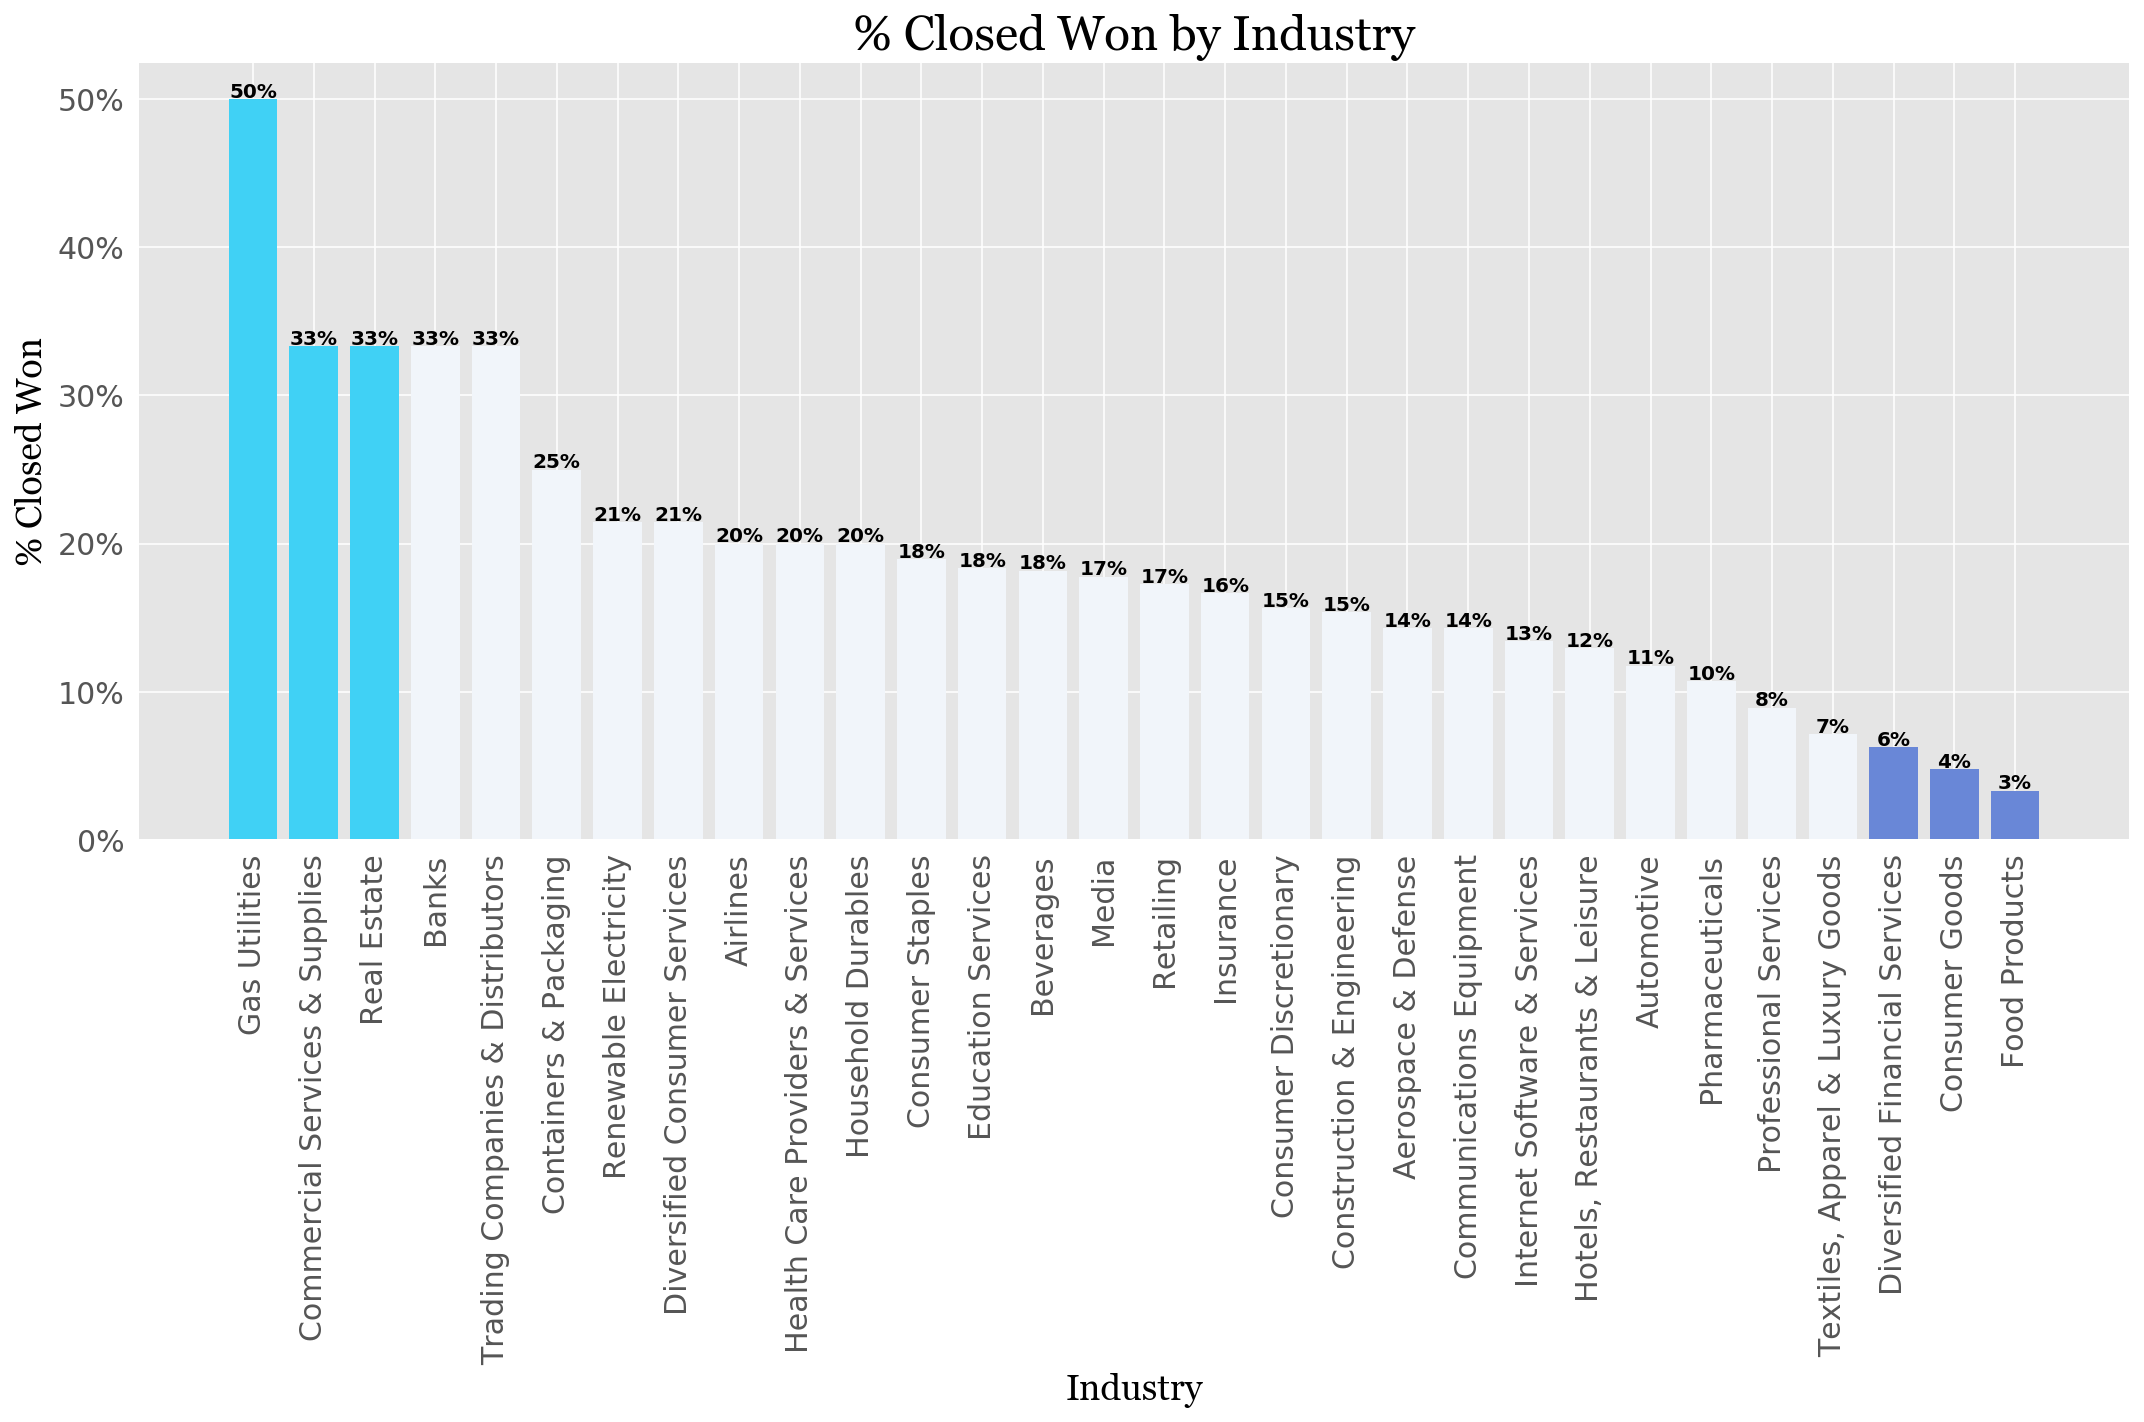

In [49]:
# Visualize % Closed Won by All Industries
# Figure size
plt.rcParams['figure.figsize'] = (15, 10)

# Set subplot
fig, ax = plt.subplots()

colors = ["#40D1F5", "#40D1F5", "#40D1F5", 
          "#F1F5FA", "#F1F5FA", "#F1F5FA",
          "#F1F5FA", "#F1F5FA", "#F1F5FA",
          "#F1F5FA", "#F1F5FA", "#F1F5FA", 
          "#F1F5FA", "#F1F5FA", "#F1F5FA", 
          "#F1F5FA", "#F1F5FA", "#F1F5FA", 
          "#F1F5FA", "#F1F5FA", "#F1F5FA", 
          "#F1F5FA", "#F1F5FA", "#F1F5FA", 
          "#F1F5FA", "#F1F5FA", "#F1F5FA", 
          "#6987D7", "#6987D7", "#6987D7"]

# Bar chart
bars = ax.bar(
    x=np.arange(30),
    height=merged_wl["Win Rate"],
    tick_label=merged_wl.index, color=colors
)

# Axis formatting
ax.tick_params(bottom=False, left=False, rotation=90, labelsize=15)
ax.set_axisbelow(True)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}%'))
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")

# Add text annotations to the top of the bars.
for bar in bars:
    ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height()+.1,
      "%d%%" % round(bar.get_height(), 2),
      horizontalalignment='center',
      color="black",
      weight='bold')

ax.set_xlabel('Industry', fontname="Georgia", fontsize=18,color='black')
ax.set_ylabel('% Closed Won', fontname="Georgia", fontsize=18, color='black')
ax.set_title('% Closed Won by Industry', fontname="Georgia", fontsize=24)

fig.tight_layout()
plt.savefig("brand_folder_closedwon.png")

In [50]:
# Find top 3 and bottom 3 % closed won by industry
top3_df = merged_wl.iloc[0:3, :]
bottom3_df = merged_wl.iloc[27:30, :]

print(f"Top three industries by % Closed Won:")
print("...................................................")
print(top3_df.index.tolist())
print("...................................................")
print(f"Bottom three industries by % Closed Won:")
print("...................................................")
print(bottom3_df.index.tolist())

Top three industries by % Closed Won:
...................................................
['Gas Utilities', 'Commercial Services & Supplies', 'Real Estate']
...................................................
Bottom three industries by % Closed Won:
...................................................
['Diversified Financial Services', 'Consumer Goods', 'Food Products']


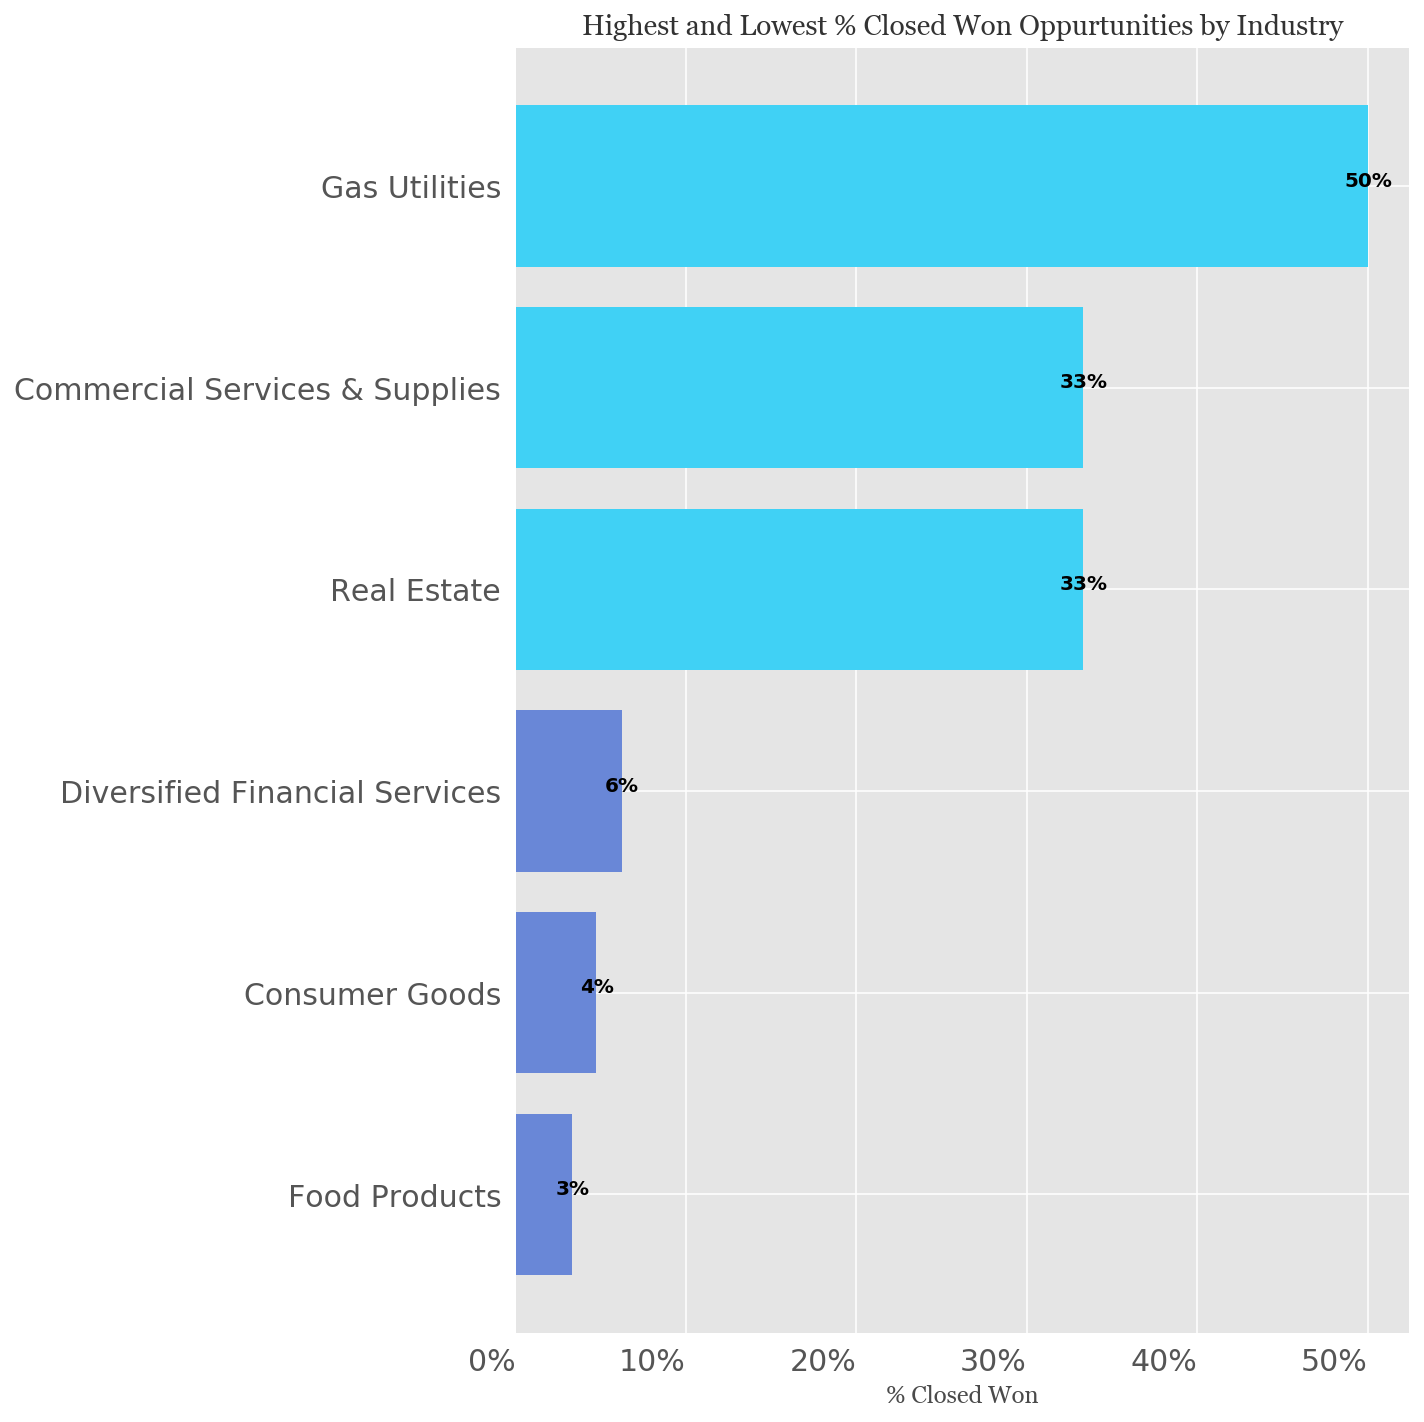

In [56]:
# Visualizing top 3 and bottom 3 % closed won by industry
top_bottom_concat = pd.concat([top3_df, bottom3_df], axis=0, join='outer')

# Set figure size
plt.rcParams['figure.figsize'] = (10, 10)
fig, ax = plt.subplots()

colors = ["#6987D7", "#6987D7", "#6987D7", "#40D1F5", "#40D1F5", "#40D1F5"]

barh_label = ['Food Products', 'Consumer Goods',
              'Diversified Financial Services','Real Estate',
              'Commercial Services & Supplies', 'Gas Utilities',]

# Horizontal Bar Chart
bars = ax.barh(
    y=np.arange(6),
    width=top_bottom_concat["Win Rate"].sort_values(ascending=True),
    tick_label=barh_label, color=colors
)

# Axis formatting
ax.tick_params(bottom=False, left=False, labelsize=15, labelleft=True)
ax.set_xlabel('% Closed Won', fontname="Georgia", fontsize=12, color="#4A4A4A")
ax.set_title('Highest and Lowest % Closed Won Oppurtunities by Industry', fontname="Georgia", fontsize=14, color="#333333")
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}%'))
plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")

# Add text annotations to the top of the bars.
for bar in bars:
    ax.text(bar.get_width()+.03,
        bar.get_y() + bar.get_height() / 2,
        "%d%%"% round(bar.get_width(), 2),
        horizontalalignment='center',
        color="black",
        weight='bold')
    
fig.tight_layout()
plt.savefig("brand_folder_highlow_barh.png")

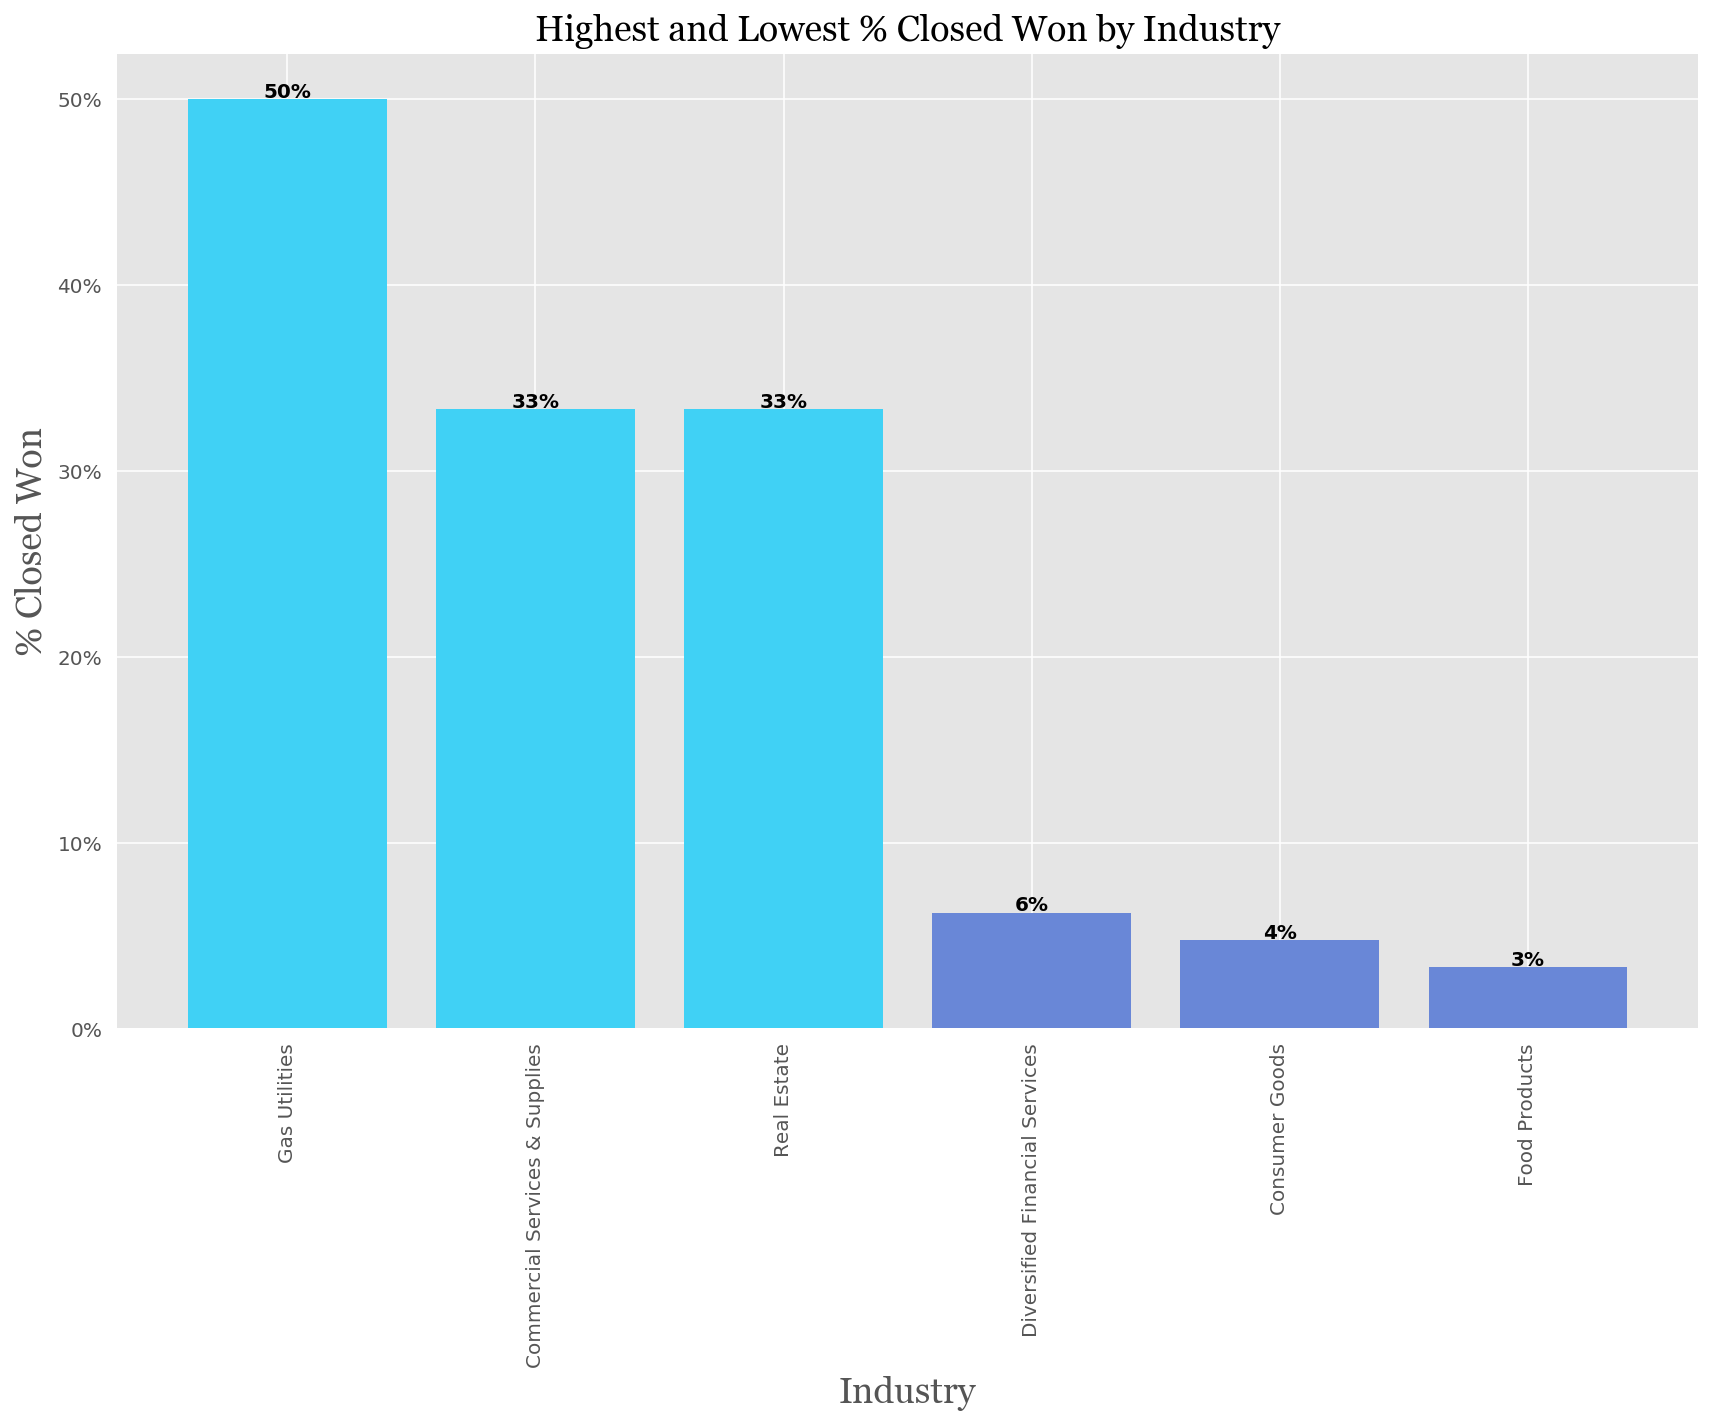

In [52]:
# Set figure size
plt.rcParams['figure.figsize'] = (12, 10)

fig, ax = plt.subplots()

colors = ["#40D1F5", "#40D1F5", "#40D1F5", "#6987D7", "#6987D7", "#6987D7"]

# Save the chart so we can loop through the bars below.
bars = ax.bar(
    x=np.arange(6),
    height=top_bottom_concat["Win Rate"],
    tick_label=top_bottom_concat.index, color=colors
)

# Axis formatting.
ax.tick_params(bottom=False, left=False, rotation=90, labelsize=10)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}%'))
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")

# Add text annotations to the top of the bars.
for bar in bars:
    ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.1,
      "%d%%" % round(bar.get_height(), 2),
      horizontalalignment='center',
      color="black",
      weight='bold')

ax.set_xlabel('Industry', fontname="Georgia", fontsize=18)
ax.set_ylabel('% Closed Won', fontname="Georgia", fontsize=18)
ax.set_title('Highest and Lowest % Closed Won by Industry', fontname="Georgia", fontsize=18)

fig.tight_layout()
plt.savefig("brand_folder_highlow_bar.png")

In [53]:
# Find revenue by industry data manipulation
# Group by industry in closed_won_df to sum() total revenue
industrywon_sum_df = closed_won_df.groupby("CB Category Industry").sum()

# Convert group to dataframe and isolate Amount column
industrywon_sum_df = pd.DataFrame(industrywon_sum_df).sort_values(["Amount"], ascending=False)
industrywon_sum_df = industrywon_sum_df[["Amount"]]
industrywon_sum_df.head()

,Amount
CB Category Industry,
Internet Software & Services,1309732.49
Professional Services,994933.12
Media,844550.00
Education Services,592655.00
Gas Utilities,498100.00


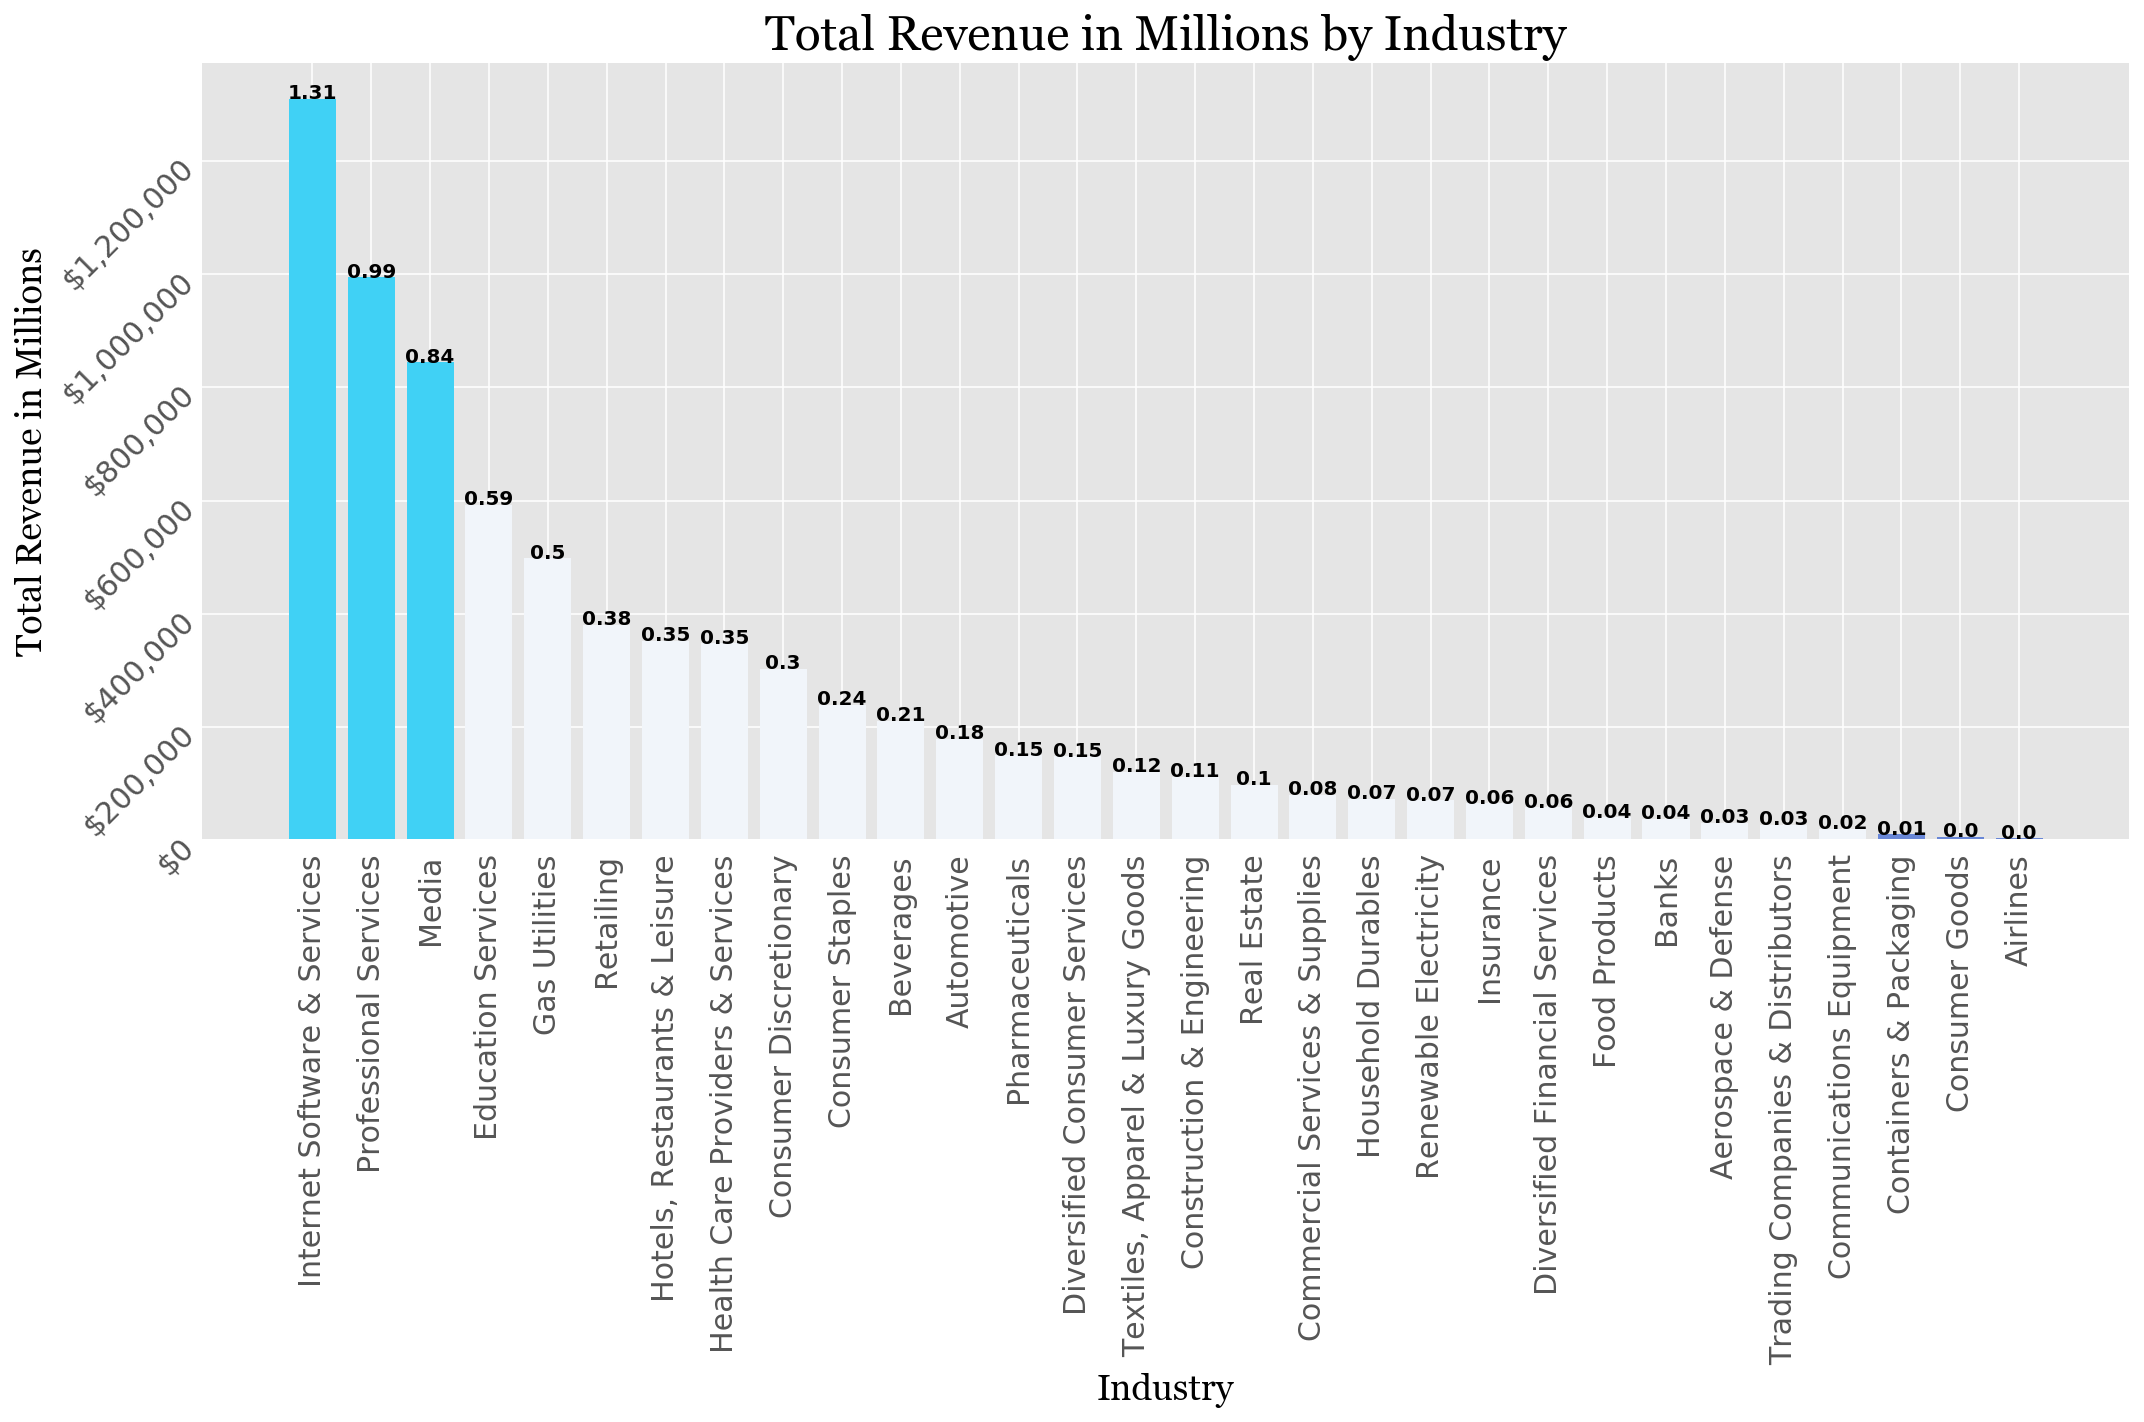

In [55]:
# Visualize Revenue by Industry
# Visualize % Closed Won by All Industries
plt.rcParams['figure.figsize'] = (15, 10)
fig, ax = plt.subplots()

colors = ["#40D1F5", "#40D1F5", "#40D1F5", 
          "#F1F5FA", "#F1F5FA", "#F1F5FA",
          "#F1F5FA", "#F1F5FA", "#F1F5FA",
          "#F1F5FA", "#F1F5FA", "#F1F5FA", 
          "#F1F5FA", "#F1F5FA", "#F1F5FA", 
          "#F1F5FA", "#F1F5FA", "#F1F5FA", 
          "#F1F5FA", "#F1F5FA", "#F1F5FA", 
          "#F1F5FA", "#F1F5FA", "#F1F5FA", 
          "#F1F5FA", "#F1F5FA", "#F1F5FA", 
          "#6987D7", "#6987D7", "#6987D7"]

# Bar chart
bars = ax.bar(
    x=np.arange(30),
    height=industrywon_sum_df["Amount"],
    tick_label=industrywon_sum_df.index, color=colors)

# Axis formatting
ax.tick_params(bottom=False, left=False, rotation=90, labelsize=15)
ax.set_axisbelow(True)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Add text annotations to the top of the bars.
for bar in bars:
    ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height()+.1,
      round(bar.get_height()/1000000.0, 2),
      horizontalalignment='center',
      color="black",
      weight='bold')

ax.set_xlabel('Industry', fontname="Georgia", fontsize=18,color='black')
ax.set_ylabel('Total Revenue in Millions', fontname="Georgia", fontsize=18, color='black')
ax.set_title('Total Revenue in Millions by Industry', fontname="Georgia", fontsize=24)


fig.tight_layout()
plt.savefig("brand_folder_industryrev.png")

In [68]:
# How much revenue did each of the top closed won % Industries generate?
wl_3_rev = industrywon_sum_df.loc['Real Estate', "Amount"]
wl_2_rev = industrywon_sum_df.loc['Commercial Services & Supplies', "Amount"]              
wl_1_rev = industrywon_sum_df.loc['Gas Utilities', "Amount"]

print(wl_1_rev)
print(wl_2_rev)
print(wl_3_rev)

498100.0
80250.0
97100.0


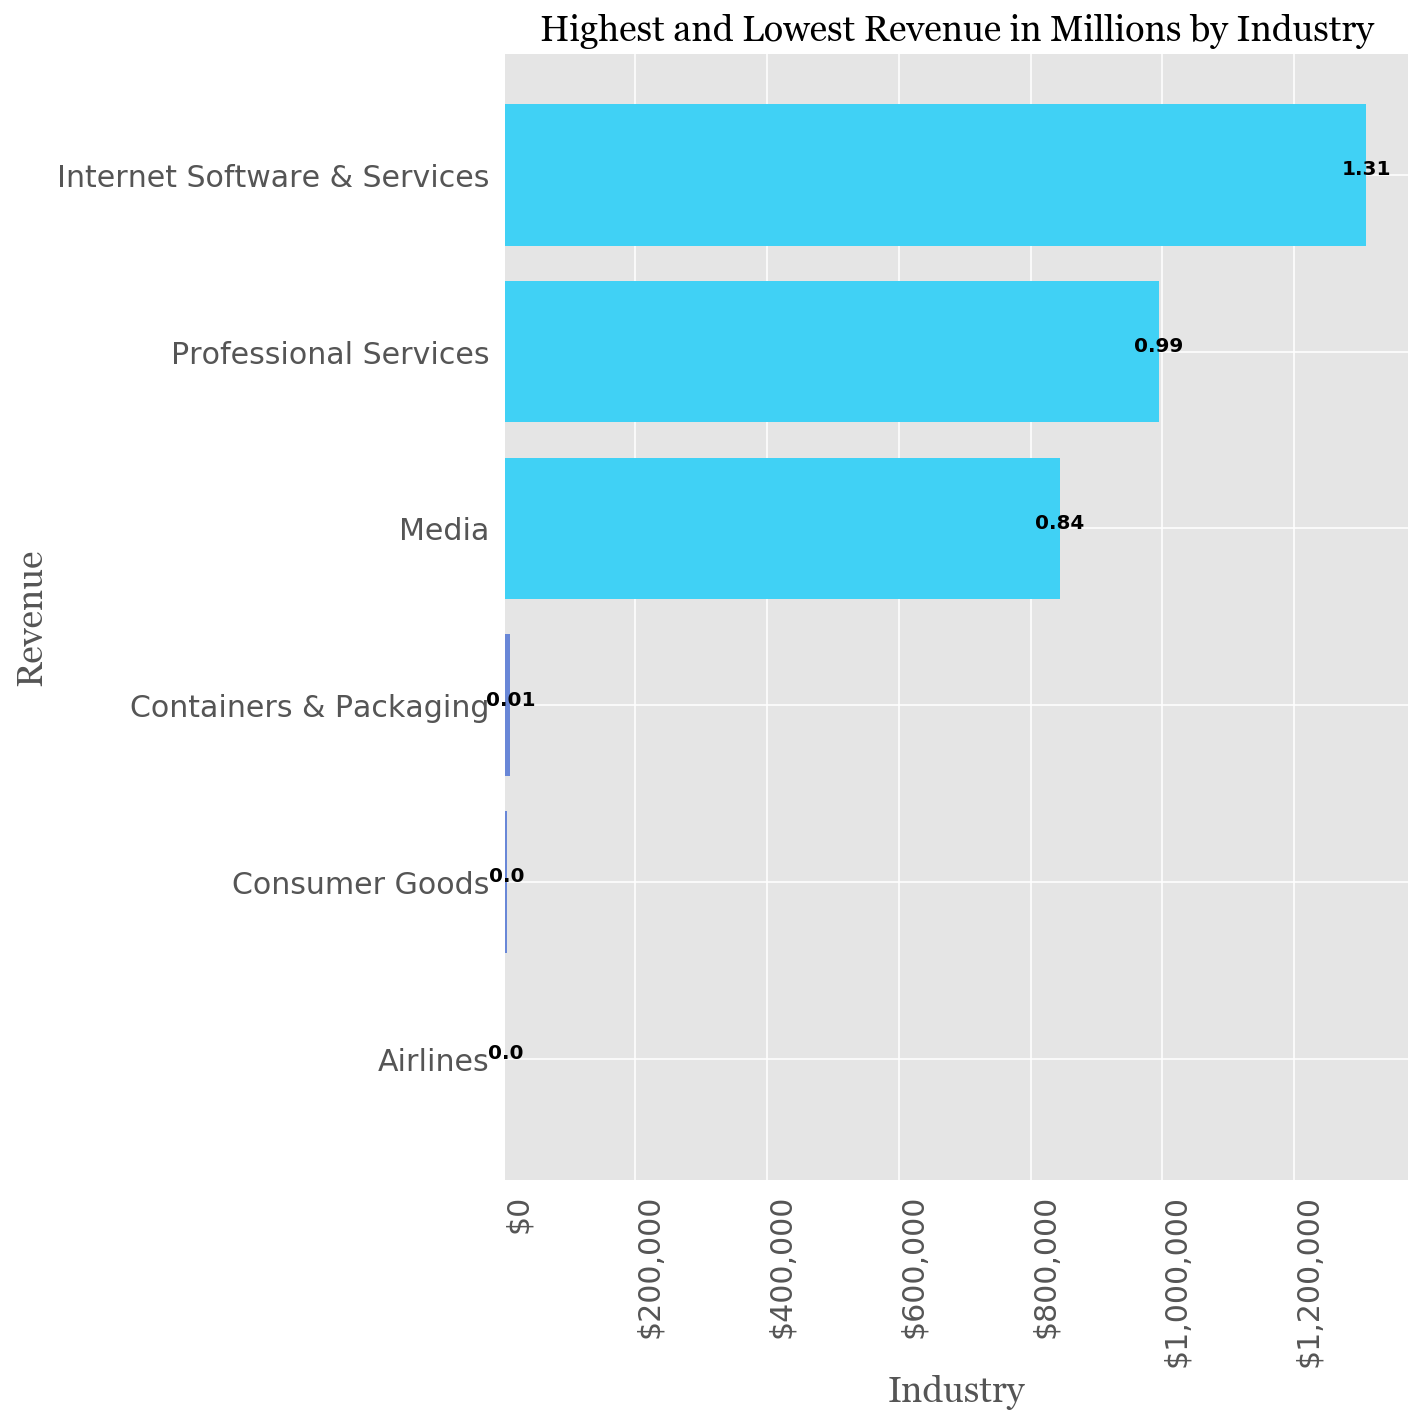

In [44]:
# Analysis of revenue by industry - calculating closed won only
top3_rev = industrywon_sum_df.iloc[0:3, :]
bottom3_rev = industrywon_sum_df.iloc[27:30, :]

top_bottom_concat = pd.concat([top3_rev, bottom3_rev], axis=0, join='outer')

barh_label = ['Airlines', 'Consumer Goods', 'Containers & Packaging', 
              'Media','Professional Services', 'Internet Software & Services']


# Set figure size
plt.rcParams['figure.figsize'] = (10, 10)
fig, ax = plt.subplots()
colors = ["#6987D7", "#6987D7", "#6987D7", "#40D1F5", "#40D1F5", "#40D1F5"]

# Bar Chart
bars = ax.barh(
    y=np.arange(6),
    width=top_bottom_concat["Amount"].sort_values(ascending=True),
    tick_label=barh_label, color=colors)

# Axis formatting
ax.tick_params(bottom=False, left=False, labelsize=15, labelleft=True)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

# Add text annotations to the top of the bars.
for bar in bars:
    ax.text(bar.get_width()+.03,
        bar.get_y() + bar.get_height() / 2,
        round(bar.get_width()/1000000, 2),
        horizontalalignment='center',
        color="black",
        weight='bold')

ax.set_xlabel('Industry', fontname="Georgia", fontsize=18)
ax.set_ylabel('Revenue', fontname="Georgia", fontsize=18)
ax.set_title('Highest and Lowest Revenue in Millions by Industry', fontname="Georgia", fontsize=18)

fig.tight_layout()
plt.savefig("brand_folder_highlow_rev.png")


In [69]:
# Top 3 industries percent of total revenue
top3_percent_totalrev = (top3_rev["Amount"].sum()/industrywon_sum_df["Amount"].sum())*100
print(f"Top 3 industries percent of total revenue: {round(top3_percent_totalrev, 2)}")

Top 3 industries percent of total revenue: 42.6


## 3. Show a breakdown of revenue by lead source 

In [72]:
# Analyzing closed_won_df grouped by lead source to determine total revenue by lead source
leadsource_group_sum = closed_won_df.groupby("Lead Source").sum().sort_values(["Amount"], ascending=False)
leadsource_group_sum = pd.DataFrame(leadsource_group_sum)
leadsource_group_sum 

,Amount
Lead Source,
Inbound,3298808.11
Outbound Sales,2395428.00
Paid Marketing,961405.00
Referral,698812.00
Event,685232.50
Software Directory,649612.50


In [66]:
# Lead Source percent of total revenue calculations
inbound_percent_total = (leadsource_group_sum.loc["Inbound", "Amount"]/leadsource_group_sum["Amount"].sum())*100
print(f"Inbound percent of total revenue: {round(inbound_percent_total, 2)}")

referral_percent_total = (leadsource_group_sum.loc["Referral", "Amount"]/leadsource_group_sum["Amount"].sum())*100
print(f"Referral percent of total revenue: {round(referral_percent_total, 2)}")

Inbound percent of total revenue: 37.96
Referral percent of total revenue: 8.04


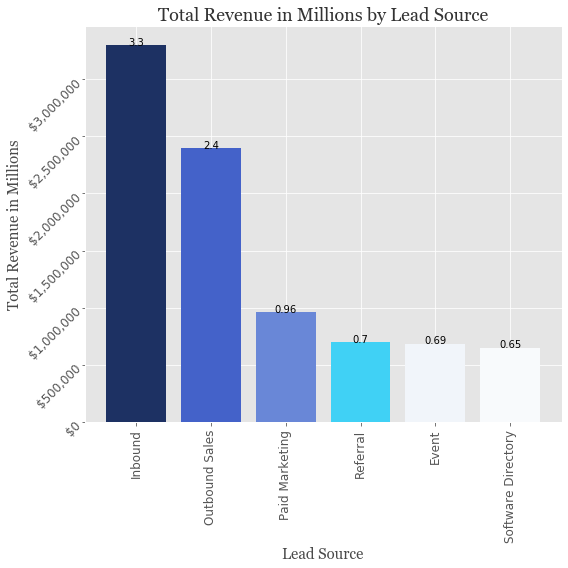

In [24]:
# Set figure size
plt.rcParams['figure.figsize'] = (8, 8)

fig, ax = plt.subplots()

colors = ['#1D3163', '#4462C9', '#6987D7','#40D1F5', '#F1F5FA', '#F8FAFC', ]

# Save the chart so we can loop through the bars below.
bars = ax.bar(
    x=np.arange(6),
    height=leadsource_group_sum["Amount"],
    tick_label=leadsource_group_sum.index, color=colors
)

# Axis formatting.
ax.tick_params(bottom=True, left=True, rotation=90, labelsize=12)

# Format y axis 
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


# Add text annotations to the top of the bars.
for bar in bars:
    ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height(),
      round(bar.get_height()/1000000, 2),
      horizontalalignment='center',
      color="black",
  )

ax.set_xlabel('Lead Source', fontname="Georgia", fontsize=15, color="#4A4A4A")
ax.set_ylabel('Total Revenue in Millions', fontname="Georgia", fontsize=15, color="#4A4A4A")
ax.set_title('Total Revenue in Millions by Lead Source', fontname="Georgia", fontsize=18, color="#333333")


fig.tight_layout()
plt.savefig("brand_folder_leadsource_rev.png")

In [25]:
# Lead Source closed won % calculation
leadsource_count_won = closed_won_df.groupby("Lead Source").count()
leadsource_count_lost = closed_lost_df.groupby("Lead Source").count()
leadsource_count_won = pd.DataFrame(leadsource_count_won["Amount"])
leadsource_count_lost = pd.DataFrame(leadsource_count_lost["Amount"])

# .join() on index Lead Source
merged_wl_ls = leadsource_count_won.join(leadsource_count_lost, lsuffix=' Closed Won', rsuffix=' Closed Lost')
merged_wl_ls["Win Rate"] = (merged_wl_ls["Amount Closed Won"]/(merged_wl_ls["Amount Closed Lost"]+merged_wl_ls["Amount Closed Won"]))*100
merged_wl_ls = merged_wl_ls.sort_values(["Win Rate"], ascending=False)
merged_wl_ls


,Amount Closed Won,Amount Closed Lost,Win Rate
Lead Source,,,
Referral,23,40,36.507937
Paid Marketing,23,97,19.166667
Software Directory,15,64,18.987342
Event,19,112,14.503817
Outbound Sales,37,275,11.858974
Inbound,103,778,11.691260


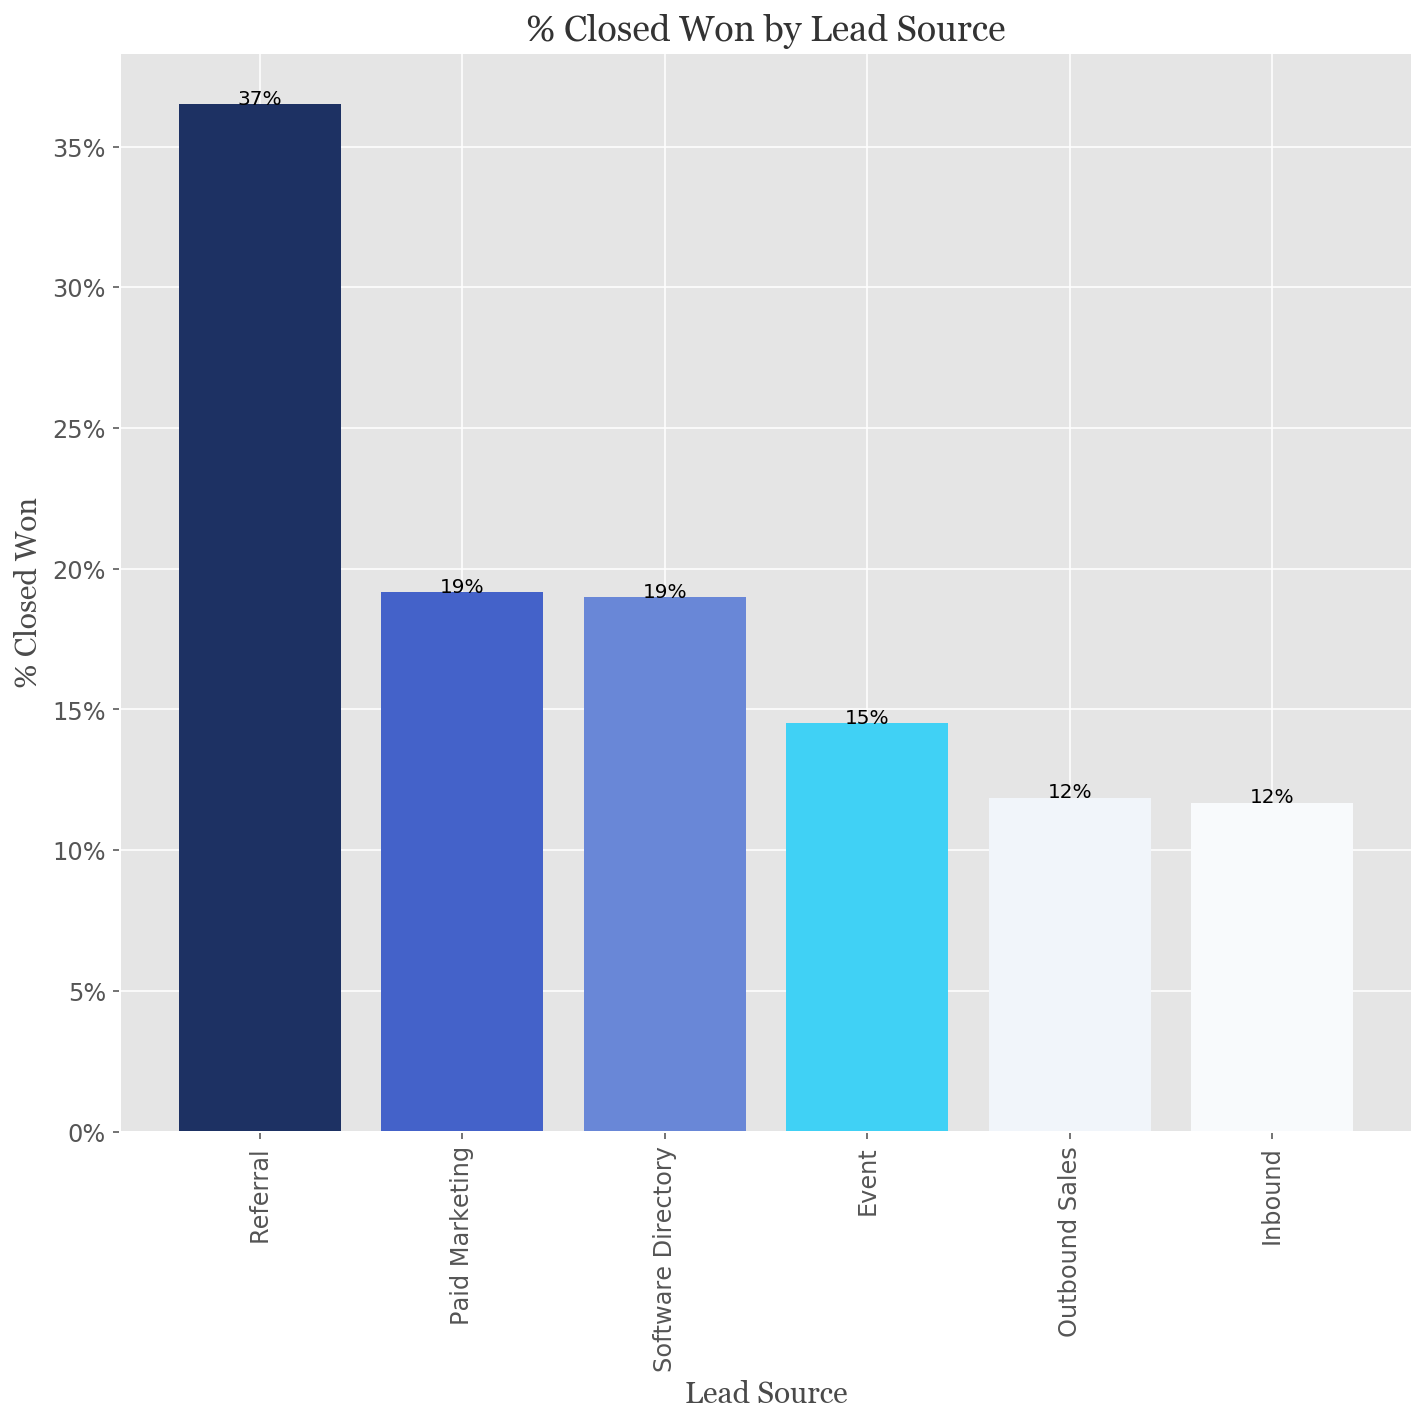

In [34]:
# Set figure size
plt.rcParams['figure.figsize'] = (10, 10)
fig, ax = plt.subplots()

colors = ['#1D3163', '#4462C9', '#6987D7','#40D1F5', '#F1F5FA', '#F8FAFC', ]

# Save the chart so we can loop through the bars below.
bars = ax.bar(
    x=np.arange(6),
    height=merged_wl_ls["Win Rate"],
    tick_label=merged_wl_ls.index, color=colors)

# Axis formatting.
ax.tick_params(bottom=True, left=True, rotation=90, labelsize=12)

# Format y axis 
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}%'))
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")

# Add text annotations to the top of the bars.
for bar in bars:
    ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height(),
      "%d%%" % round(bar.get_height()),
      horizontalalignment='center',
      color="black")

ax.set_xlabel('Lead Source', fontname="Georgia", fontsize=15, color="#4A4A4A")
ax.set_ylabel('% Closed Won', fontname="Georgia", fontsize=15, color="#4A4A4A")
ax.set_title('% Closed Won by Lead Source', fontname="Georgia", fontsize=18, color="#333333")

fig.tight_layout()
plt.savefig("brand_folder_leadsource_%won.png")